In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [18]:
def draw_size_chart(filename, start_prog=0, except_progs=[]):
    results = []
    with open(filename) as csvfile:
        read_csv = csv.reader(csvfile, delimiter=',')
        for row in read_csv:
            results.append(row)
#     if len(results) - 1 > max_prog:
#         results = results[1:max_prog - len(results) + 1]
#     else:
    results = results[1:]
    
    # set width of bar
    barWidth = 0.2

    # set height of bar
    bars1 = [float(row[1]) for row in results if int(row[0]) not in except_progs]
    bars2 = [float(row[2]) for row in results if int(row[0]) not in except_progs]
    bars3 = [float(row[3]) for row in results if int(row[0]) not in except_progs]
    bars4 = [float(row[4]) for row in results if int(row[0]) not in except_progs]

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]

    # Make the plot
    plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='End')
    plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='Stage')
    plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='Step')
    plt.bar(r4, bars4, color='m', width=barWidth, edgecolor='white', label='Ind.')

    # Add xticks on the middle of the group bars
    plt.xlabel('Program', fontsize=15)
    plt.ylabel("Size of MSS", fontsize=15)
    plt.xticks([r + barWidth for r in range(len(bars1))], [int(row[0])+start_prog for row in results if int(row[0]) not in except_progs])
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    # Create legend & Show graphic
    plt.legend(fontsize=15)
    plt.show()


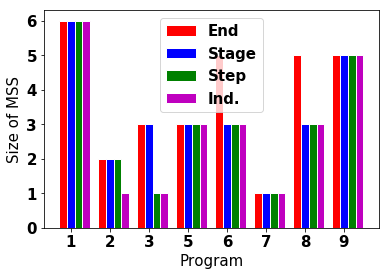

In [19]:
draw_size_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\size_experiments_programs.csv", start_prog=0, except_progs=[4,10])

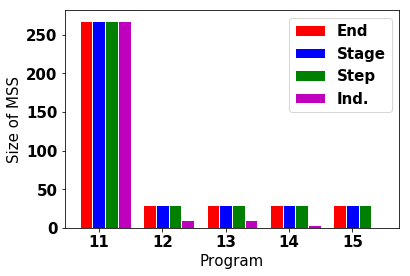

In [20]:
draw_size_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\size_experiments_join_programs.csv", start_prog=10, except_progs=[])

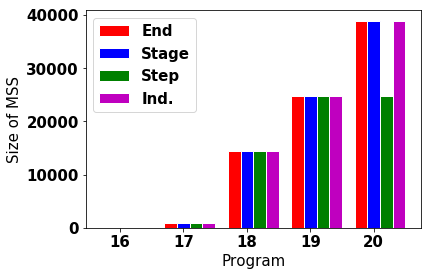

In [21]:
draw_size_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\size_experiments_num_rules_programs.csv", start_prog=15)

In [22]:
def draw_line_runtime_chart(filename, start_prog=0):
    results = []
    with open(filename) as csvfile:
        read_csv = csv.reader(csvfile, delimiter=',')
        for row in read_csv:
            results.append(row)
    results = results[1:]
    
    progs = [float(row[0])+start_prog for row in results]
    end = [math.log(float(row[1]), 10) for row in results]
    stage = [math.log(float(row[2]), 10) for row in results]
    step = [math.log(float(row[3]), 10) for row in results]
    ind = [math.log(float(row[4]), 10) for row in results]
    plt.plot(progs, end, color='r', label='End')
    plt.plot(progs, stage, color='b', label='Stage')
    plt.plot(progs, step, color='g', label='Step')
    plt.plot(progs, ind, color='m', label='Ind.')
    plt.xlabel('Program', fontsize=15)
    plt.ylabel('Runtime in sec (log scale)', fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

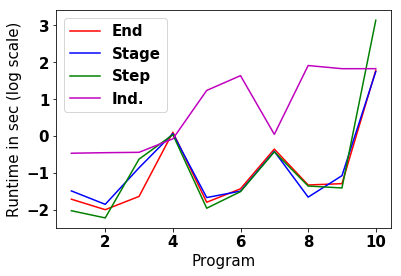

In [23]:
draw_line_runtime_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_experiments_programs.csv", start_prog=0)

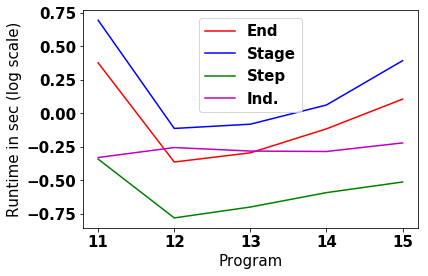

In [27]:
draw_line_runtime_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_experiments_join_programs.csv", start_prog= 10)

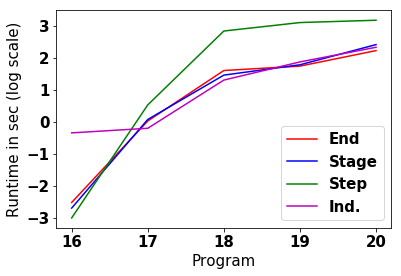

In [28]:
draw_line_runtime_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_experiments_num_rules_programs.csv", start_prog= 15)

In [14]:
import re
import matplotlib.pyplot as plt
import math

def draw_donut_runtime_breakdown_chart(filename):
    results = []
    with open(filename) as csvfile:
        read_csv = csv.reader(csvfile, delimiter=',')
        for row in read_csv:
            results.append(row)
    results = results[1:]
    
    # average the values
    data = [-1, -1, -1]
    data[0] = sum([float(row[1]) for row in results]) / len(results)
    data[1] = sum([float(row[2]) for row in results]) / len(results)
    data[2] = sum([float(row[3]) for row in results]) / len(results)
    
    # increase font size
    plt.rcParams['font.size'] = 14.0
    plt.rcParams['text.color'] = 'k'
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['font.family'] = 'sans-serif'

    # Pie chart
    last = 'Traverse' if "step" in filename else 'Solve'
    labels = ['Eval', 'Process Prov', last]
    #colors
    colors = ['r','b','g']
    
    #explsion
    explode = (0.05,0.05,0.05)
    
    fig1, ax1 = plt.subplots()
    _, _, autotexts = ax1.pie(data, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.8, explode = explode)
    for autotext in autotexts:
        autotext.set_color('white')
#         autotext.set_weight('normal')
    #draw circle
    centre_circle = plt.Circle((0,0),0.60,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')  
    plt.tight_layout()
    plt.show()



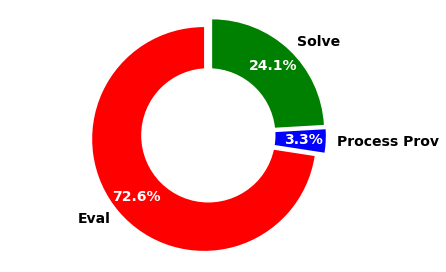

In [15]:
draw_donut_runtime_breakdown_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_breakdown_independent_programs.csv")

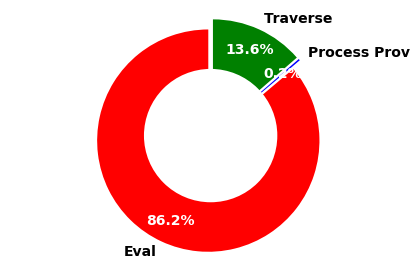

In [16]:
draw_donut_runtime_breakdown_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_breakdown_step_programs.csv")

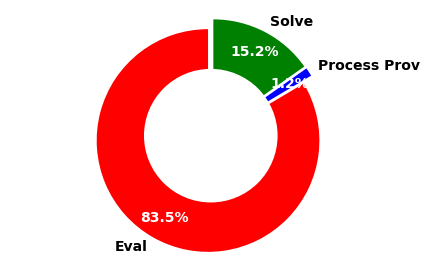

In [126]:
draw_donut_runtime_breakdown_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_breakdown_independent_join_programs.csv")

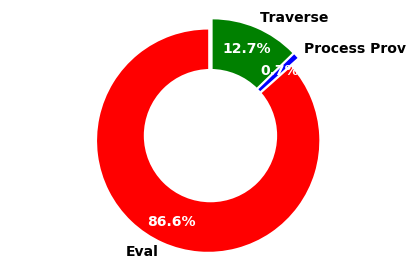

In [127]:
draw_donut_runtime_breakdown_chart("C:\\Users\\user\\git\\causal-rules\\Experiments\\runtime_breakdown_step_join_programs.csv")